In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import imblearn
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap

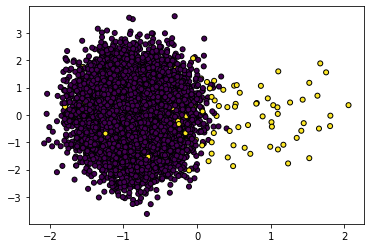

In [2]:
X1, Y1 = make_classification(n_samples=10000, weights=[0.99],  n_clusters_per_class = 1, random_state = 2021 )
plt.scatter(X1[:, 0]  , X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25,random_state=2021)

<ipython-input-39-51dbff94542e>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=cmap_light)


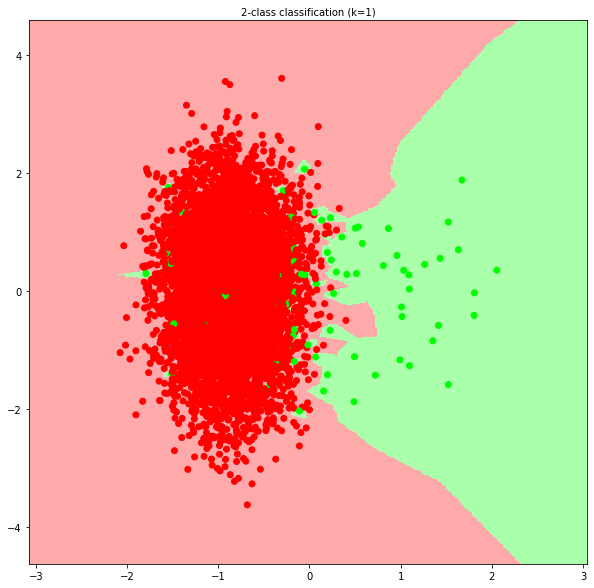

In [39]:
x_vis = X_train[:,:2]#임의로2개의 변수만을 이용
y_vis = y_train.ravel()

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000','#00FF00'])

for k in [1]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_vis, y_vis)
    
    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()

In [60]:
print(len(X_test))
print(len(X_train))
print(len(y_test))
print(len(y_train))

2500
7500
2500
7500


100%|██████████| 100/100 [00:37<00:00,  2.69it/s]


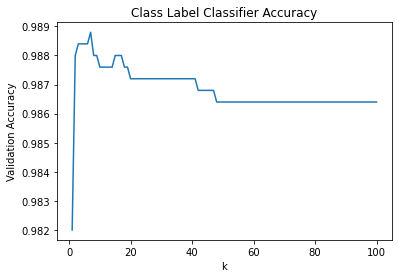

optimized k value : [7]
Highest accuracy: 0.988


In [23]:
k_list=range(1,101)
accuracies=[]
for k in tqdm(k_list):
    knn=KNeighborsClassifier(n_neighbors=k, weights='uniform',p=2)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()

from sklearn.model_selection import cross_val_score

best_k = [k_list[i] for i in range (len(accuracies)) if accuracies[i]==np.max(accuracies)]
print('optimized k value :',best_k)
print('Highest accuracy:', accuracies[best_k[0]])

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

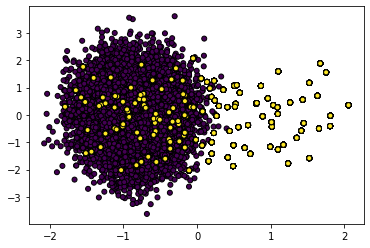

In [6]:
ros=RandomOverSampler(random_state=2021)
ros.fit(X1,Y1)
X_resampled, y_resampled= ros.fit_resample(X1,Y1)
plt.scatter(X_resampled[:, 0]  , X_resampled[:, 1], marker='o', c=y_resampled, s=25, edgecolor='k')
plt.show()

In [7]:
X_test_ros,X_train_ros,y_test_ros,y_train_ros=train_test_split(X_resampled, y_resampled, test_size=0.33,random_state=2021)

In [8]:
print(len(X_test_ros))
print(len(X_train_ros))
print(len(y_test_ros))
print(len(y_train_ros))

13209
6507
13209
6507


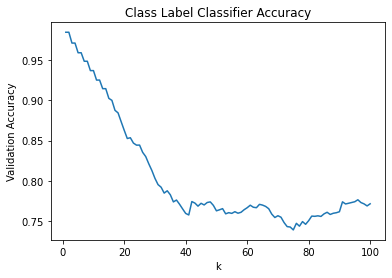


optimized k value : [1, 2]
Highest accuracy: 0.9847163048623792


In [8]:
k_list=range(1,101)
accuracies=[]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k, weights='uniform',p=2)
    knn.fit(X_train_ros, y_train_ros)
    accuracies.append(knn.score(X_test_ros, y_test_ros))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()
print()

from sklearn.model_selection import cross_val_score

best_k = [k_list[i] for i in range (len(accuracies)) if accuracies[i]==np.max(accuracies)]
print('optimized k value :',best_k)
print('Highest accuracy:', accuracies[best_k[0]])

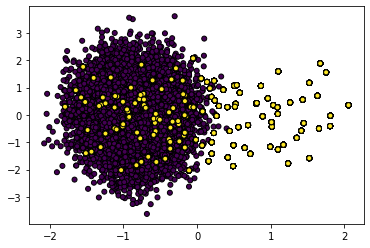

In [9]:
rus=RandomUnderSampler(random_state=2021)
rus.fit(X1,Y1)
X_resampled_2, y_resampled_2= rus.fit_resample(X1,Y1)
plt.scatter(X_resampled[:, 0]  , X_resampled[:, 1], marker='o', c=y_resampled, s=25, edgecolor='k')
plt.show()

In [10]:
X_test_rus,X_train_rus,y_test_rus,y_train_rus=train_test_split(X_resampled_2, y_resampled_2, test_size=0.33,random_state=2021)

In [11]:
print(len(X_test_rus))
print(len(X_train_rus))
print(len(y_test_rus))
print(len(y_train_rus))

190
94
190
94


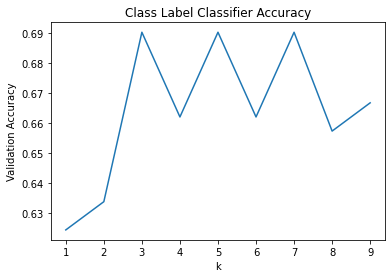


optimized k value : [3, 5, 7]
Highest accuracy: 0.6619718309859155


In [31]:
k_list=range(1,10)
accuracies=[]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k, weights='uniform',p=2)
    knn.fit(X_train_rus, y_train_rus)
    accuracies.append(knn.score(X_test_rus, y_test_rus))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()
print()

from sklearn.model_selection import cross_val_score

best_k = [k_list[i] for i in range (len(accuracies)) if accuracies[i]==np.max(accuracies)]
print('optimized k value :',best_k)
print('Highest accuracy:', accuracies[best_k[0]])

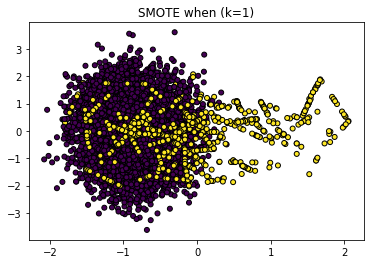

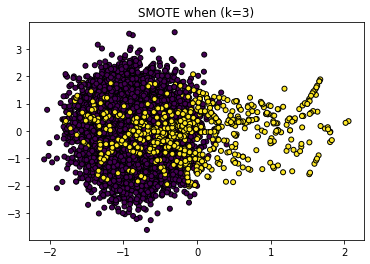

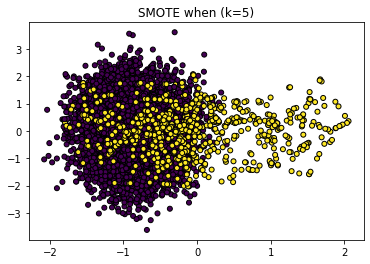

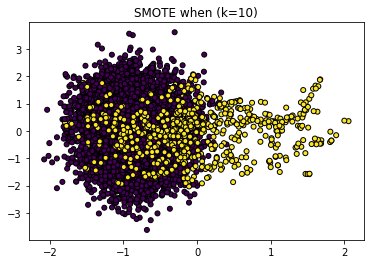

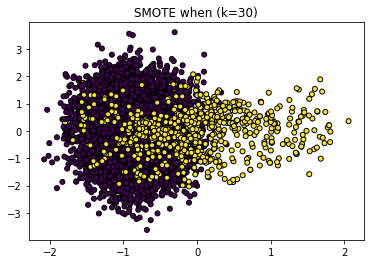

In [18]:
from imblearn.over_sampling import SMOTE
k_value=[1,3,5,10,30]
for k in k_value:
    over=SMOTE(sampling_strategy=0.1, k_neighbors=k)
    over.fit(X_train,y_train)
    X_resampled, y_resampled = over.fit_resample(X_train,y_train)
    plt.scatter(X_resampled[:, 0]  , X_resampled[:, 1], marker='o', c=y_resampled, s=25, edgecolor='k')
    plt.title(f'SMOTE when (k={k})')
    plt.show()
    

100%|██████████| 100/100 [02:13<00:00,  1.33s/it]


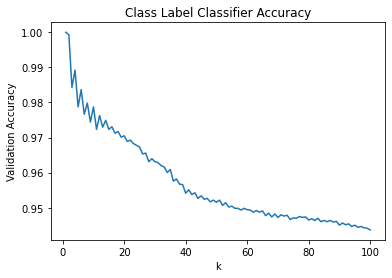


optimized k value : [1]
Highest accuracy: 0.9992620833845776


In [21]:
k_list=range(1,101)
accuracies=[]
for k in tqdm(k_list):
    knn=KNeighborsClassifier(n_neighbors=k, weights='uniform',p=2)
    knn.fit(X_resampled, y_resampled)
    accuracies.append(knn.score(X_resampled, y_resampled))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()
print()

best_k = [k_list[i] for i in range (len(accuracies)) if accuracies[i]==np.max(accuracies)]
print('optimized k value :',best_k)
print('Highest accuracy:', accuracies[best_k[0]])

<ipython-input-37-0c9566650599>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=cmap_light)


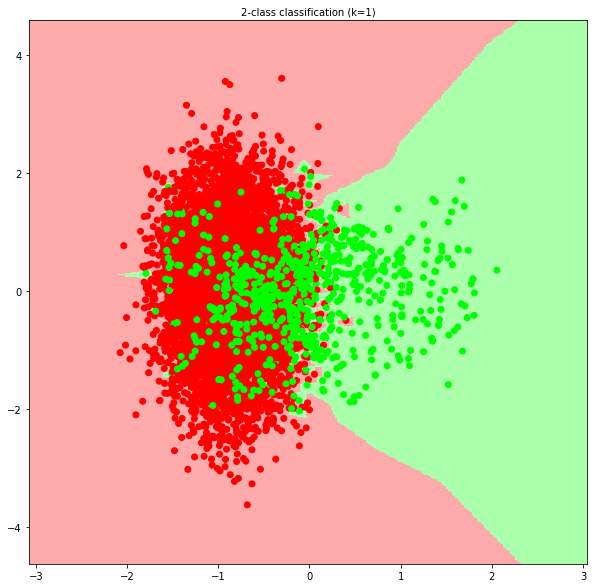

In [37]:
x_vis = X_resampled[:,:2]#임의로2개의 변수만을 이용
y_vis = y_resampled.ravel()

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000','#00FF00'])

for k in [1]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_vis, y_vis)
    
    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()

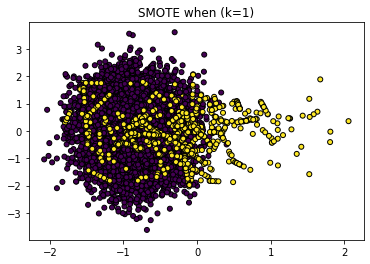

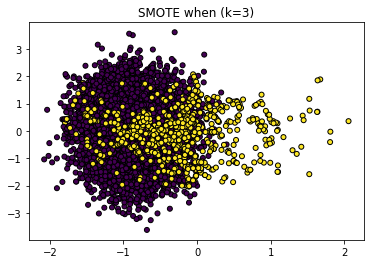

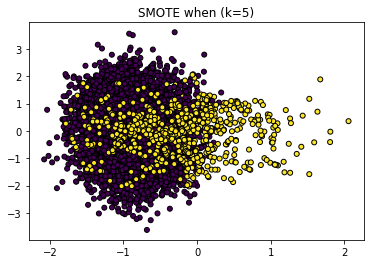

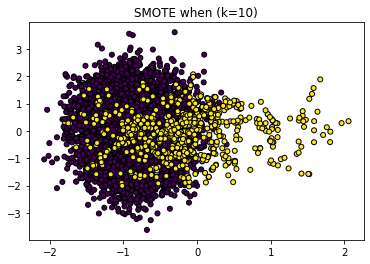

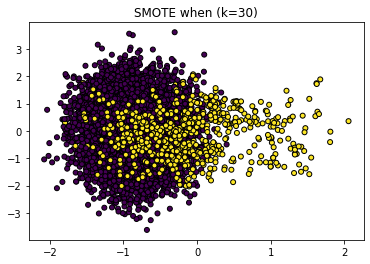

In [32]:
from imblearn.over_sampling import ADASYN
k_value=[1,3,5,10,30]
for k in k_value:
    over=ADASYN(sampling_strategy=0.1, n_neighbors=k)
    over.fit(X_train,y_train)
    X_resampled_ADA, y_resampled_ADA = over.fit_resample(X_train,y_train)
    plt.scatter(X_resampled_ADA[:, 0]  , X_resampled_ADA[:, 1], marker='o', c=y_resampled_ADA, s=25, edgecolor='k')
    plt.title(f'SMOTE when (k={k})')
    plt.show()

100%|██████████| 100/100 [02:14<00:00,  1.35s/it]


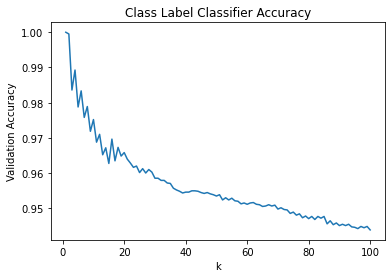


optimized k value : [1]
Highest accuracy: 0.9995065383666419


In [33]:
k_list=range(1,101)
accuracies=[]
for k in tqdm(k_list):
    knn=KNeighborsClassifier(n_neighbors=k, weights='uniform',p=2)
    knn.fit(X_resampled_ADA, y_resampled_ADA)
    accuracies.append(knn.score(X_resampled_ADA, y_resampled_ADA))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()
print()

best_k = [k_list[i] for i in range (len(accuracies)) if accuracies[i]==np.max(accuracies)]
print('optimized k value :',best_k)
print('Highest accuracy:', accuracies[best_k[0]])

<ipython-input-38-6c0d1259c421>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=cmap_light)


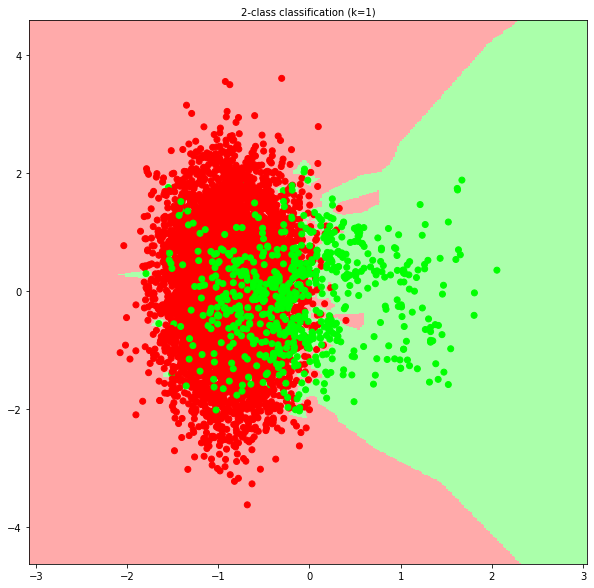

In [38]:
x_vis = X_resampled_ADA[:,:2]#임의로2개의 변수만을 이용
y_vis = y_resampled_ADA.ravel()

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000','#00FF00'])

for k in [1]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_vis, y_vis)
    
    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()